## Iris dataset
**It contains measurements of different parts of the iris flower, including the sepal length, sepal width, petal length, and petal width, as well as the corresponding species label for each observation. There are 150 observations in total, with 50 observations for each of the three iris species: setosa, versicolor, and virginica.**

This cell imports the load_iris() function from the sklearn.datasets module and uses it to load the Iris dataset which is mentioned above. The data is stored in the iris variable as a dictionary-like object with keys for the data (iris.data), target labels (iris.target), and other information about the dataset (iris.DESCR). Take a note of all the keys displayed below which constitute information about iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- These are the features of each datapoint in the Iris dataset, which are length and width of petal and sepal
- We will be training our model on these features combinedly to predict an unknown datapoint to which class it belongs

In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- These are the names of classes in the Iris dataset
- Each datapoint belongs to any one of the class
- Our job is to train the model so that an unknown datapoint can be labeled based on its features

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Since we cannot plot all 4 features simultaneously in 4D space, we plot two graphs with 2 features at a time<br/>**
Scatter plot of datapoints with respective 2 features namely
 - Sepal Length
 - Sepal Width

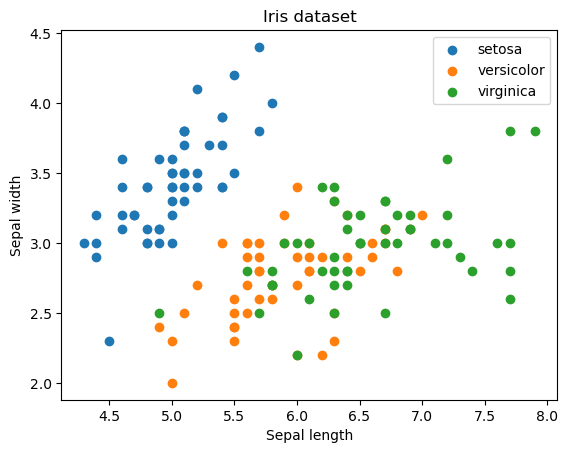

In [4]:
import matplotlib.pyplot as plt

# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

Scatter plot of datapoints with respective 2 features namely
 - Petal Length
 - Petal Width

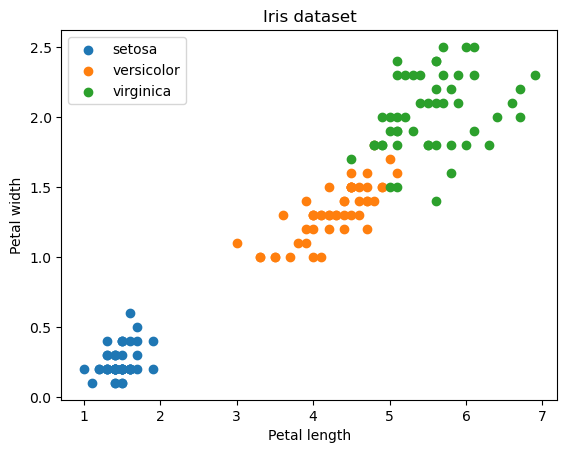

In [5]:
# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 2], iris.data[iris.target==i, 3], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

## Nearest Centroid or Minimum distance to Mean
- **The minimum distance to mean classifier is a simple classification algorithm that classifies a new sample by computing the distances between the sample and the mean of each class and then assigning the sample to the class with the closest mean.**
- **In this algorithm, the mean of each class is calculated from the training samples of that class, and the distance between the new sample and the class mean is computed using a distance metric such as the Euclidean distance.**
- **The algorithm is also sometimes called the nearest centroid classifier. It is a linear classifier and is widely used in pattern recognition applications.**

This cell import Iris data from sklearn.datasets module and assigns variable `X` to `iris.data` that is the **feature values** and assign variable `y` to `iris.target` that is the **class labels**

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Split the dataset into training and testing set with test size of 20%

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Import `NearestCentroid` class from sklearn and construct an object class `model`. Train the model on training data `X_train` and `y_train`

In [8]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(X_train, y_train)

NearestCentroid()

After training the model predict the labels on test set `X_test`

In [9]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

Print accuracy of our model using `accuracy_score` comparing to the actual labels `y_test` of test set with our preicted values `y_pred`

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


Below are plots of obtained centroids for each class with 2 features at a time

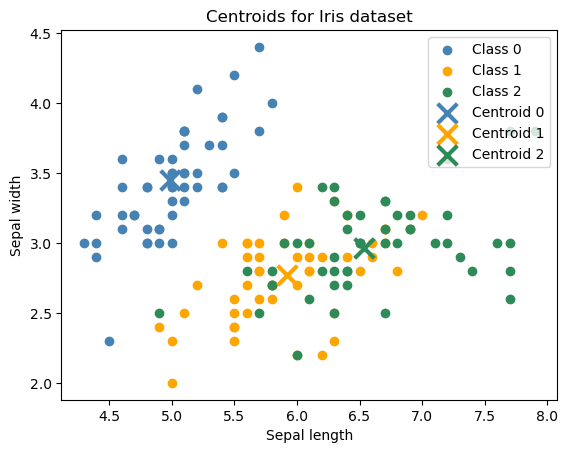

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
colors = ['steelblue', 'orange', 'seagreen']
for i, color in enumerate(colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color,  label=f"Class {i}")

# Get the centroids
centroids = model.centroids_
classes = model.classes_

# Plot the centroids
for i, c in enumerate(classes):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, linewidth=3, c=colors[i], label=f"Centroid {i}")

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Centroids for Iris dataset')
    
# Add legends and show the plot
plt.legend()
plt.show()

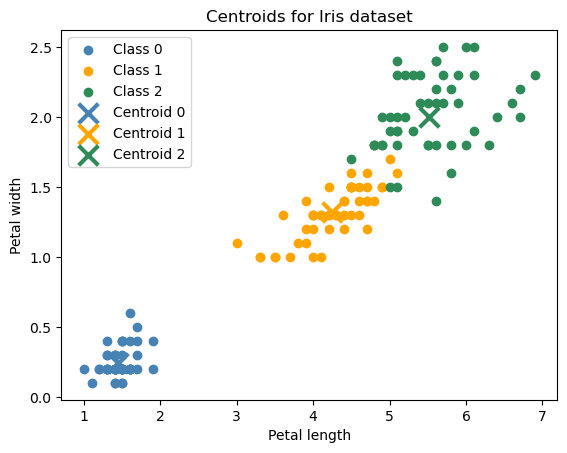

In [12]:
# Plot the data points
colors = ['steelblue', 'orange', 'seagreen']
for i, color in enumerate(colors):
    plt.scatter(X[y == i, 2], X[y == i, 3], c=color,  label=f"Class {i}")

# Get the centroids
centroids = model.centroids_
classes = model.classes_

# Plot the centroids
for i, c in enumerate(classes):
    plt.scatter(centroids[i, 2], centroids[i, 3], marker='x', s=200, linewidth=3, c=colors[i], label=f"Centroid {i}")

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Centroids for Iris dataset')    
    
# Add legends and show the plot
plt.legend()
plt.show()

## Geology dataset
- **It consists of 233 datapoints each one having 19 features and a class label**
- **Of the 19 features first feature is the ID of datapoint represented as FID, one of the feature has high frequency of unknown values so this feature is discarded from model training**
- **Hence useful features are 17 and 1 class label**
- **All features are categorical type meaning only certain values are permitted for that feature**

In [13]:
import pandas as pd

# Import dataset
df = pd.read_csv('trainingTestingDataset.csv')

# Get target and feature variables
y = df['label']
X = df.drop(['RCLS_GEOL', 'FID', 'label'], axis=1)
X = X.iloc[:, :]

print('Initial columns:', df.columns)
print('\nUseful columns:', X.keys())

Initial columns: Index(['FID', 'RCL_D2FLT', 'RCLS_CHM_C', 'RCLS_CHM_D', 'RCLS_COM_C',
       'RCLS_COM_D', 'RCLS_CTCT_', 'RCLS_D1ANT', 'RCLS_D1FLT', 'RCLS_D1XD2',
       'RCLS_D2_X', 'RCLS_D2ANT', 'RCLS_D2FLT', 'RCLS_DE_D2', 'RCLS_DELFT',
       'RCLS_DOL_D', 'RCLS_GEOL', 'RCLS_GRN', 'RCLS_STR_D', 'label'],
      dtype='object')

Useful columns: Index(['RCL_D2FLT', 'RCLS_CHM_C', 'RCLS_CHM_D', 'RCLS_COM_C', 'RCLS_COM_D',
       'RCLS_CTCT_', 'RCLS_D1ANT', 'RCLS_D1FLT', 'RCLS_D1XD2', 'RCLS_D2_X',
       'RCLS_D2ANT', 'RCLS_D2FLT', 'RCLS_DE_D2', 'RCLS_DELFT', 'RCLS_DOL_D',
       'RCLS_GRN', 'RCLS_STR_D'],
      dtype='object')


Below is the plot of this dataset and we will be performing Nearest Centroid clustering to find out number of clusters in the dataset and its pattern

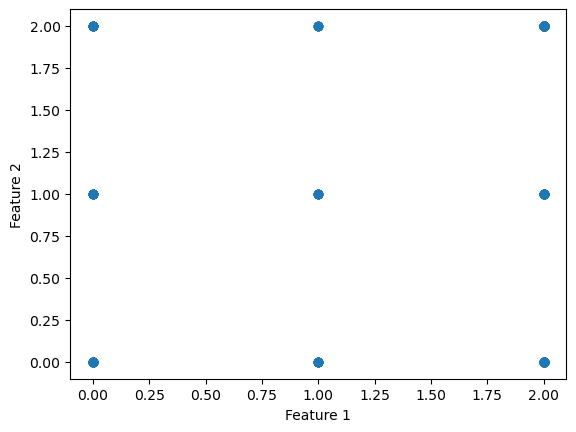

In [14]:
import matplotlib.pyplot as plt

# plot the dataset with respective two variables
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- Here we are reading the dataset from a csv file
- As mentioned we are only interested in the useful features and class label
- Hence we discard the columns `RCLS_GEOL` and `FID`
- Note that we also discard the column `label` since it is the target variable and should not interfere with training process
- Then we proceed to evaluate our model

In [15]:
# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiate the model
nrc = NearestCentroid()

# Fit the model
nrc.fit(X_train, y_train)

# Predict the test set classes from trained model
y_pred = nrc.predict(X_test)

# Caculate and display accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8936170212765957


After obtaining the clusters and their centroids we can observe the pattern in the dataset with below plot

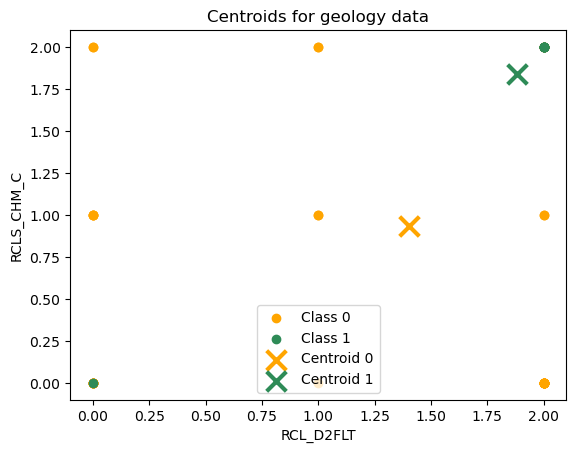

In [16]:
# Plot the data points
colors = ['orange', 'seagreen']
for i, color in enumerate(colors):
    plt.scatter(X_test[y_test == i]['RCL_D2FLT'], X_test[y_test == i]['RCLS_CHM_C'], c=color, label=f"Class {i}")

# Get the centroids
centroids = nrc.centroids_
classes = nrc.classes_

# Plot the centroids
for i, c in enumerate(classes):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, linewidth=3, c=colors[i], label=f"Centroid {i}")

# Set plot labels
plt.xlabel('RCL_D2FLT')
plt.ylabel('RCLS_CHM_C')
plt.title('Centroids for geology data')

# Add legends and show the plot
plt.legend()
plt.show()